# **Assignment 2 Part 2**

### Assignment Instructions

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Write your answers in place of `...` and `pass`
* Hardcoded answers will get `zero` marks

### Submission Instructions

* There are two parts of this assignment. You should name both notebooks as **YourRollNumber_PartNumber.ipynb**. (e.g. this part should be named as *`2XXXXXXX_2.ipynb`*)
* You must submit a zip file containg just two notebooks and it must not has any folder or any other file. 
* The name of the zip file must be your `Roll Number`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [2]:
import otter
grader = otter.Notebook()

In [3]:
# Do not change this cell

df_2019 = pd.read_csv('2019.csv', encoding='latin-1')
df_2020 = pd.read_csv('2020.csv', encoding='latin-1')
df_2021 = pd.read_csv('2021.csv', encoding='latin-1')

In [4]:
# Standardizing the column names
df_2019.columns = df_2019.columns.str.lower()
df_2020.columns = df_2019.columns.str.lower()
df_2021.columns = df_2019.columns.str.lower()

# Restructuring the column indexes
df_2019 = df_2019[['rank', 'university', 'region', 'academic reputation', 'employer reputation', 'faculty student', 'international faculty','international students', 'citations per faculty', 'overall score'] ]
df_2020 = df_2020[['rank', 'university', 'region', 'academic reputation', 'employer reputation', 'faculty student', 'international faculty','international students', 'citations per faculty', 'overall score'] ]
df_2021 = df_2021[['rank', 'university', 'region', 'academic reputation', 'employer reputation', 'faculty student', 'international faculty','international students', 'citations per faculty', 'overall score'] ]


Let's check a few rows from each dataframe

In [5]:
df_2019.sample(5)

,rank,university,region,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score
40,41,"University of California, San Diego (UCSD)",USA,91.7,56.1,62.1,64.9,70.7,84.5,78.6
53,54,The University of Warwick,UK,73.8,96.1,62.4,98.4,99.3,56.1,72.9
5,6,University of Cambridge,UK,100.0,100.0,100.0,99.4,97.9,77.2,95.6
89,90,Lomonosov Moscow State University,Russia,71.3,78.2,99.7,16.6,73.1,6.7,62.3
48,49,The Chinese University of Hong Kong (CUHK),China,86.1,62.7,75.9,100.0,91.2,49.5,75.6


In [6]:
df_2020.sample(5)

,rank,university,region,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score
22,22,The University of Tokyo,Japan,67.9,26.2,11.1,93.3,99.1,100.0,84.3
4,5,California Institute of Technology (Caltech),USA,100.0,87.3,99.4,100.0,81.2,97.8,96.9
74,76,University of Zurich,Switzerland,38.7,59.4,100.0,99.7,64.5,58.6,65.8
86,86,The University of Western Australia,Australia,88.3,98.7,100.0,20.8,59.8,62.4,62.9
96,97,University of Southampton,UK,68.1,92.8,96.1,59.0,52.5,50.8,60.6


In [7]:
df_2021.sample(5)

,rank,university,region,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score
52,53,Université PSL,France,26.2,72.1,67.1,100.0,98.6,77.7,73.4
0,1,Massachusetts Institute of Technology (MIT),USA,99.8,94.1,100.0,100.0,100.0,100.0,100.0
43,44,The London School of Economics and Political S...,UK,91.1,100.0,100.0,34.8,99.7,78.9,77.0
36,37,Seoul National University,South Korea,61.6,11.9,19.2,88.0,91.1,96.9,79.6
69,70,Universiti Malaya (UM),Malaysia,41.5,57.2,62.8,90.7,72.0,68.2,67.1


Let's also see where we stand in terms of Null values and data types

In [8]:
df_2019.info()
df_2020.info()
df_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    100 non-null    int64  
 1   university              100 non-null    object 
 2   region                  100 non-null    object 
 3   academic reputation     100 non-null    float64
 4   employer reputation     100 non-null    float64
 5   faculty student         100 non-null    float64
 6   international faculty   100 non-null    float64
 7   international students  100 non-null    float64
 8   citations per faculty   100 non-null    float64
 9   overall score           100 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  ------------

So, all good!

Notice that there is no 'year' column in any of the dataframe. As your first task, append an appropriate 'year' column in each dataframe.

**Q1.** Add a column 'year' in each dataframe. It must correspond to the year for which the data is represented. (2)

In [9]:
df_2019['year'] = '2019'        #adding column year with 2019 as values 
df_2020['year'] = '2020'        #adding column year with 2020 as values
df_2021['year'] = '2021'        #adding column year with 2021 as values

In [10]:
grader.check("q1")

q1 results: All test cases passed!

**Q2.** Next, find the count of universities in each region that made it to the Top 100 each year. Print all of them in the same cell. (2)
<br> You will have three aggregated objects. Name them a,b,c for data belonging to 2019,2020,2021 respectively.

In [11]:
a = df_2019.groupby('region')['university'].size()      #groupby regions while counting the number of universities in each of them 
b = df_2020.groupby('region')['university'].size()
c = df_2021.groupby('region')['university'].size()
print(a)
print(b)
print(c)

region
Argentina       1
Australia       6
Belgium         1
Canada          2
China          11
Denmark         1
France          3
Germany         3
Japan           5
Malaysia        1
Netherlands     4
New Zealand     1
Russia          1
Scotland        1
Singapore       2
South Korea     4
Sweden          1
Switzerand      3
Taiwan          1
UK             18
USA            30
Name: university, dtype: int64
region
Argentina       1
Australia       7
Belgium         1
Canada          2
China          11
Denmark         1
France          2
Germany         3
Japan           5
Malaysia        1
Netherlands     2
New Zealand     1
Russia          1
Singapore       2
South Korea     5
Sweden          2
Switzerland     4
Taiwan          1
UK             19
USA            29
Name: university, dtype: int64
region
Argentina       1
Australia       7
Belgium         1
Canada          2
China          11
Denmark         1
France          2
Germany         4
Japan           5
Malaysia        1

In [12]:
grader.check("q2")

q2 results: All test cases passed!

**Q3.** Using your answer to the previous question, visualize the count of universities in each region that made it to the Top 100 (for the year 2021). Note: you have to use a suitable visualization. (3)

Text(0.5, 0, 'number of universities')

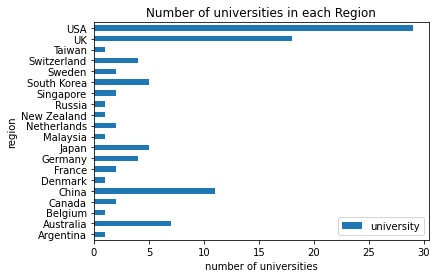

In [13]:
ax = c.plot.barh(title='Number of universities in each Region', legend = True)      #plot a horizontal bar graph
ax.set_xlabel('number of universities')

**Q4.** Sort the 2020 dataframe based on overall score in an ascending order. (1)

In [14]:
df_2020 = df_2020.sort_values('overall score')      #sort the dataframe in ascending order of the values of column "overall score"

In [15]:
grader.check("q4")

q4 results: All test cases passed!

**Q5.** Drop the rank column from all dataframes (2019,2020,2021). (1)

In [16]:
df_2019 = df_2019.drop('rank', axis=1)      #removes the coloumn "rank" from each dataframe
df_2020 = df_2020.drop('rank', axis=1)
df_2021 = df_2021.drop('rank', axis=1)

In [17]:
grader.check("q5")

q5 results: All test cases passed!

**Q6.** Create a new dataframe called "USA_2020", containing only universities which belong to the USA region from 2020 dataframe. Remove the 'year' and 'region' column from this dataframe. (2)

In [18]:
USA_rows = df_2020['region'].values == 'USA'        #select rows from dataframe with only USA in the "region" column
USA_2020 = df_2020[USA_rows]                        #creates a new dataframe containing only rows with USA in the "region column"
USA_2020 = USA_2020.drop('year', axis=1)            #removes the "year" column from the new dataframe
USA_2020 = USA_2020.drop('region', axis=1)          #removes the "region" column from the new dataframe

In [19]:
grader.check("q6")

q6 results: All test cases passed!

**Q7.** In the 'USA_2020' dataframe, make the 'university' column the index of the dataframe. (2)

In [20]:
USA_2020 = USA_2020.set_index('university')     #set "university" column as the index

In [21]:
grader.check("q7")

q7 results: All test cases passed!

**Q8.** Using only the following attributes: 'academic reputation','employer reputation','faculty student','international faculty','international students','citations per faculty','overall score'. <br> Represent USA_2020 dataframe using a box and whisker plot. Do you observe any anomalies in any of them? (8)
<br>**Note:** They should be in the same cell, but not necessarily in the same figure.<br>

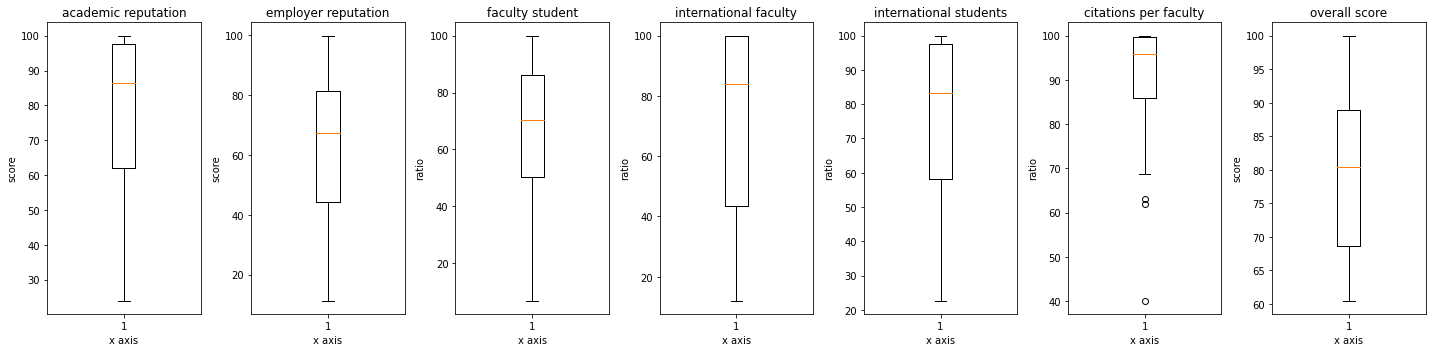

In [22]:
%matplotlib inline
plt.figure(figsize=(20,5))                          #resize the plot size

plt.subplot(1,7,1)
plt.boxplot(USA_2020['academic reputation'])        #creates boxplot for academic reputation
plt.title('academic reputation')                    #sets the title 
plt.xlabel('x axis')                                #sets x-axis label
plt.ylabel('score')                                 #sets y-axis label

plt.subplot(1,7,2)
plt.boxplot(USA_2020['employer reputation'])
plt.title('employer reputation')
plt.xlabel('x axis')
plt.ylabel('score')

plt.subplot(1,7,3)
plt.boxplot(USA_2020['faculty student'])
plt.title('faculty student')
plt.xlabel('x axis')
plt.ylabel('ratio')

plt.subplot(1,7,4)
plt.boxplot(USA_2020['international faculty'])
plt.title('international faculty')
plt.xlabel('x axis')
plt.ylabel('ratio')

plt.subplot(1,7,5)
plt.boxplot(USA_2020['international students'])
plt.title('international students')
plt.xlabel('x axis')
plt.ylabel('ratio')

plt.subplot(1,7,6)
plt.boxplot(USA_2020['citations per faculty'])
plt.title('citations per faculty')
plt.xlabel('x axis')
plt.ylabel('ratio')

plt.subplot(1,7,7)
plt.boxplot(USA_2020['overall score'])
plt.title('overall score')
plt.xlabel('x axis')
plt.ylabel('score')

plt.tight_layout()
plt.show()


### Yes there are 3 anomalies in citations per faculty, indicating that there are three such universities which have unusually less ratio of citations per faculty ###

**Q9.** Create a new dataframe called "USUK_2021". This dataframe will contain all universities in the "USA" and "UK" region. Once created, remove the 'year' and 'rank' column. Also, set the index of the "USUK_2021 to the "university" column. (3)<br>
**Note:** Very similar to Question 6 and the data to be used should belong to 2021 and not 2020.

In [23]:
USUK_2021 = df_2021.loc[(df_2021['region'] == 'USA') | (df_2021['region'] == 'UK')]     #make new dataframe with rows containing only USA or UK in "region" column 
USUK_2021 = USUK_2021.drop('year', axis=1)                                              #drops the "year" column
USUK_2021 = USUK_2021.drop('region', axis=1)                                            #drops the "region" column
USUK_2021 = USUK_2021.set_index('university')                                           #sets "university" column as index

In [24]:
grader.check("q9")

q9 results: All test cases passed!

**Q10.** Represent all the attributes in the USUK_2021 dataframe using a scatter plot. Do you observe any general trend? (5+2) <br>
**Note:** They should be in the same cell, but not necessarily in the same figure.<br>

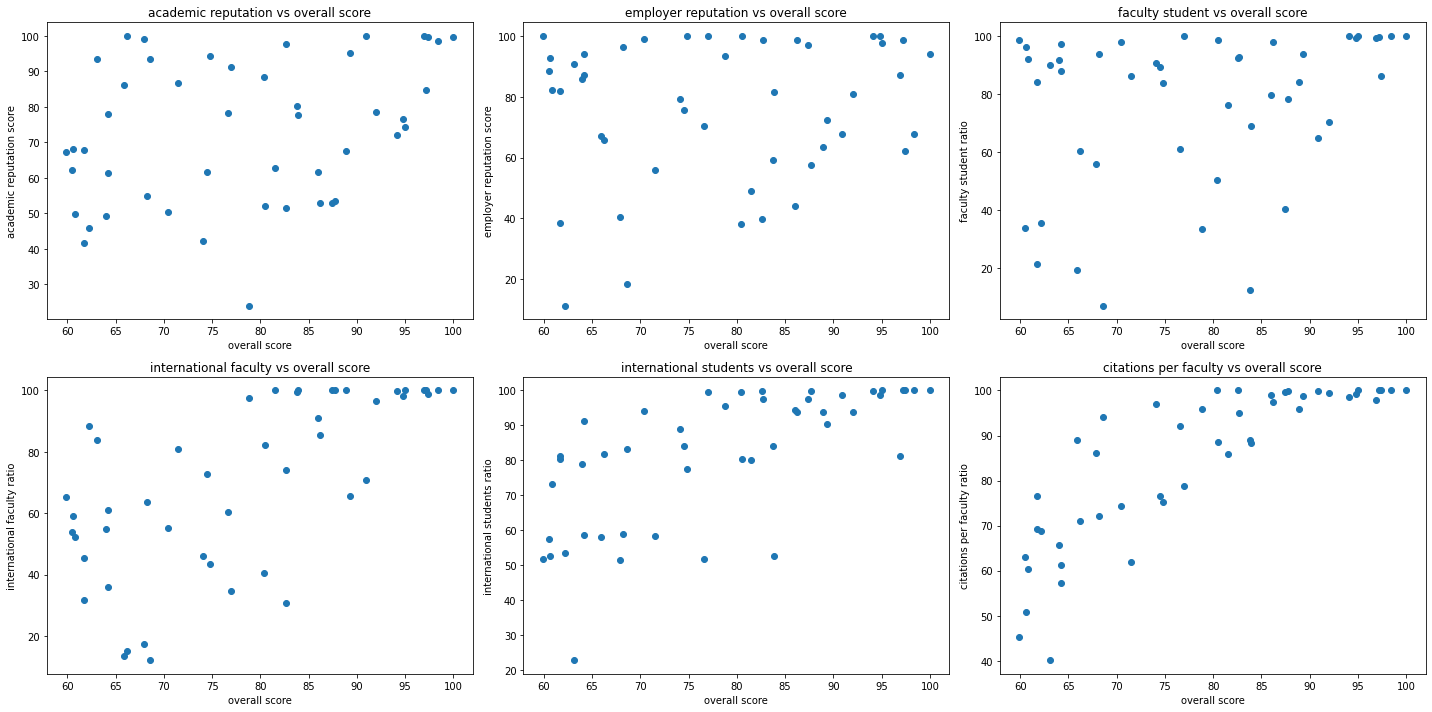

In [25]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.scatter(USUK_2021['overall score'], USUK_2021['academic reputation'])       #plots the scatterplot for each attribute against overall score
plt.title('academic reputation vs overall score')
plt.xlabel('overall score')
plt.ylabel('academic reputation score')

plt.subplot(2,3,2)
plt.scatter(USUK_2021['overall score'], USUK_2021['employer reputation'])
plt.title('employer reputation vs overall score')
plt.xlabel('overall score')
plt.ylabel('employer reputation score')

plt.subplot(2,3,3)
plt.scatter(USUK_2021['overall score'], USUK_2021['faculty student'])
plt.title('faculty student vs overall score')
plt.xlabel('overall score')
plt.ylabel('faculty student ratio')

plt.subplot(2,3,4)
plt.scatter(USUK_2021['overall score'], USUK_2021['international faculty'])
plt.title('international faculty vs overall score')
plt.xlabel('overall score')
plt.ylabel('international faculty ratio')

plt.subplot(2,3,5)
plt.scatter(USUK_2021['overall score'], USUK_2021['international students'])
plt.title('international students vs overall score')
plt.xlabel('overall score')
plt.ylabel('international students ratio')

plt.subplot(2,3,6)
plt.scatter(USUK_2021['overall score'], USUK_2021['citations per faculty'])
plt.title('citations per faculty vs overall score')
plt.xlabel('overall score')
plt.ylabel('citations per faculty ratio')

plt.tight_layout()
plt.show()

### There is a strong positive correlation between overall score and citations per faculty 

### There is weak positive correlation between overall score and international faculty and between overall score and international students ###

### There seems no correlation between overall score and all other remaining attributes like academic reputation, employer reputation and faculty student 

Let's finally look at an useful tool to get an idea about how different variables are corelated to each other. We call it a **correlation matrix** <br>
A correlation matrix provides a correlation coefficient (a number between -1 and 1) that tells how strongly two variables are correlated. Values closer to -1 mean strong negative correlation whereas values closer to 1 mean strong positve correlation. Values closer to 0 show variables having no or little correlation. <br>

**Q11.** Plot a correlation matrix to see how each variable is correlated to another. You can use the data from df_2019 . (3) <br> Provide a reasonable interpretation of the values obtained in the Correlation matrix. (1)

In [26]:
corr = df_2019.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(3)      #plots the correlation matrix

,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score
academic reputation,1.000,0.638,0.033,-0.008,0.114,0.107,0.786
employer reputation,0.638,1.000,0.094,0.179,0.262,-0.020,0.651
faculty student,0.033,0.094,1.000,-0.072,-0.063,-0.261,0.391
international faculty,-0.008,0.179,-0.072,1.000,0.670,0.177,0.282
international students,0.114,0.262,-0.063,0.670,1.000,0.010,0.305
citations per faculty,0.107,-0.020,-0.261,0.177,0.010,1.000,0.369
overall score,0.786,0.651,0.391,0.282,0.305,0.369,1.000


### There is a strong positive correlation between:
1) academic reputation and overall score

### There is a moderate positive correlation between:
1) academic reputation and employer reputation
2) internation students and internation faculty 
3) employer reputation and overall score

### There is a weak positive correlation between:
1) employer reputation and international students
2) faculty student and overall score
3) international faculty and overall score
4) internation students and overall score
5) citations per faculty and overall score

### There is a weak negative correlation betweeen 
1) citations per faculty and faculty student

**How employable are you if you attend one of the top ten universities in the world? Let's find out.** <br><br>
**Q12.** Create a smaller dataframe which has the top ten universities from each year (based on overall score). Remove all columns except the 'employer reputation' column. We will be evaluating the top ten universities based on their employer reputation scores. Name the resultant dataframe, "resultant_df". (3) <br>
Hint: 

*   There will be four columns in the dataframe you make. One for the university name and the other three for their employer reputation scores across three years' data.
*   The top ten universities are same across the three years (by overall scores). Only their rankings differ.
*   Use the merge function. You can read more about how to use it in the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
*   Shape of the resultant dataframe should be (10, 4)






In [27]:
reputation_2019 = df_2019.sort_values('overall score', ascending = False)               #sorting the dataframe into descending order
reputation_2019 = reputation_2019[['university','employer reputation']].head(10)        #selecting only top 10 universities

reputation_2020 = df_2020.sort_values('overall score', ascending = False)
reputation_2020 = reputation_2020[['university','employer reputation']].head(10)

reputation_2021 = df_2021.sort_values('overall score', ascending = False)
reputation_2021 = reputation_2021[['university','employer reputation']].head(10)

resultant_df = reputation_2019.merge(reputation_2020, how='inner', on='university')    #merging the all the three dataframes together
resultant_df = resultant_df.merge(reputation_2021, how='inner', on='university')
resultant_df

,university,employer reputation_x,employer reputation_y,employer reputation
0,Massachusetts Institute of Technology (MIT),100.0,94.1,94.1
1,Stanford University,100.0,67.7,67.7
2,Harvard University,100.0,62.2,62.2
3,California Institute of Technology (Caltech),81.2,87.3,87.3
4,University of Oxford,100.0,98.5,98.5
5,University of Cambridge,100.0,97.6,97.6
6,ETH Zurich - Swiss Federal Institute of Techno...,96.2,98.0,98.0
7,Imperial College London,99.9,100.0,100.0
8,University of Chicago,90.7,81.0,81.0
9,UCL,99.2,100.0,100.0


In [28]:
grader.check("q12")

q12 results: All test cases passed!

**As you noticed that when you merged, Pandas auto-assigned the column names. Let's change them.** <br><br>
**Q13.** For the columns representing scores, rename them such that they describe the data that the column holds. (3)

In [29]:
resultant_df.rename(columns = {'employer reputation_x':'Employer Reputation 2019', 'employer reputation_y':'Employer Reputation 2020', 'employer reputation':'Employer Reputation 2021'}, inplace = True)

In [30]:
grader.check("q13")

q13 results: All test cases passed!

**Q14.** Draw a suitable plot to show how the employer reputation scores of the Top 10 universities varied over the three years. Clearly label your graph and attach a legend. Add a reasonable interpretation of the plot as comments in your code below. (4)<br> <br>
Note 1: All universities must be in the same plot.<br>
Note 2: Your graph should be clear and legend should be placed suitably .



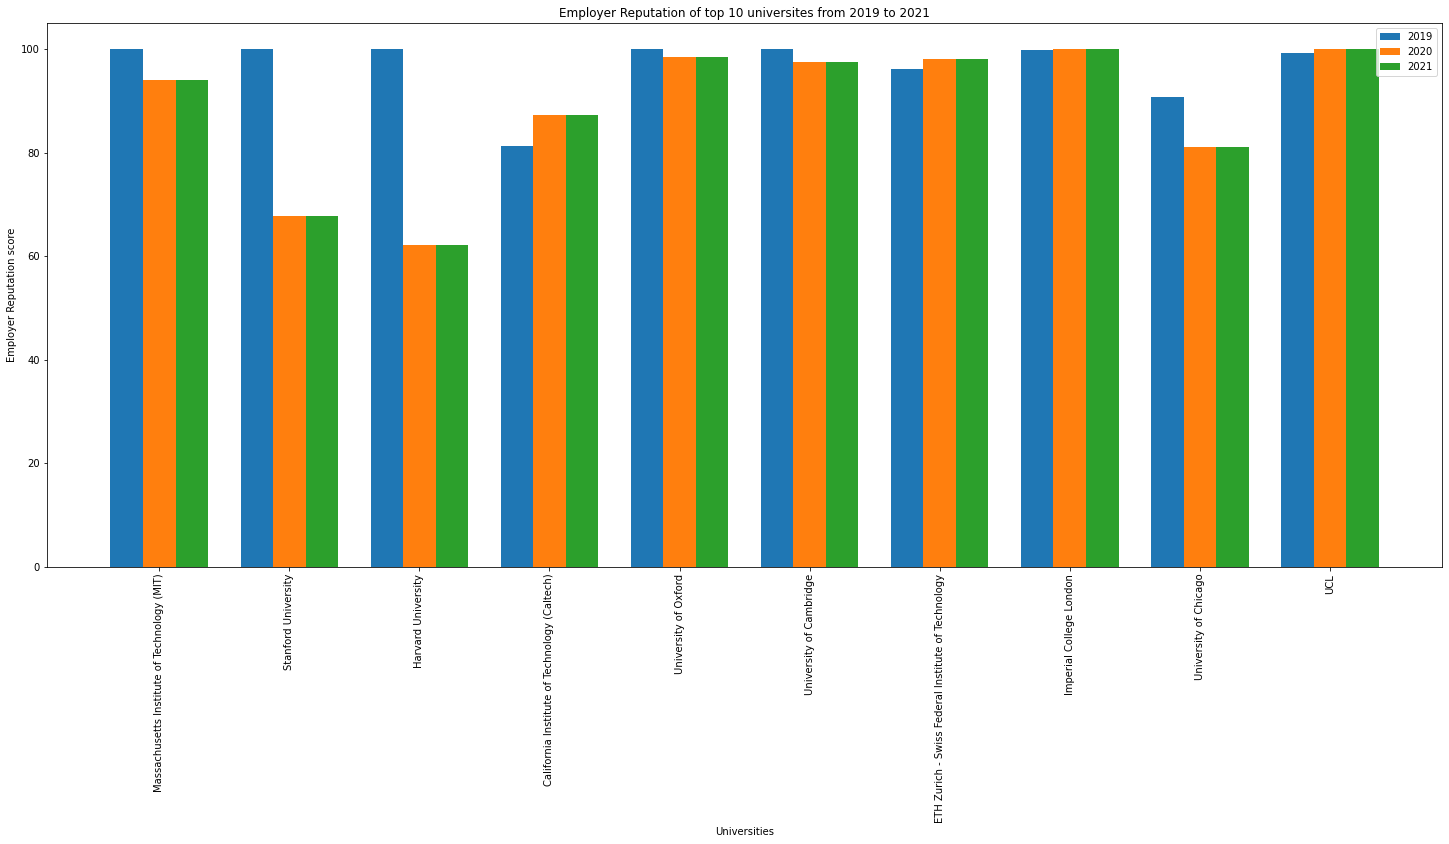

In [31]:
X_axis = np.arange(10)
plt.figure(figsize=(25,10))

plt.bar(X_axis + 0, resultant_df['Employer Reputation 2019'], 0.25, label = '2019')         #plotting bars for 2019 column
plt.bar(X_axis + 0.25, resultant_df['Employer Reputation 2020'], 0.25, label = '2020')      #plotting bars for 2020 column
plt.bar(X_axis + 0.5, resultant_df['Employer Reputation 2021'], 0.25, label = '2021')       #plotting bars for 2021 column
  
plt.xticks(X_axis+0.25, resultant_df['university'], rotation = 90)                          #rotating the x labels

plt.xlabel("Universities")                                                                  #setting xlabel of plots
plt.ylabel("Employer Reputation score")                                                     #setting ylabel of plot
plt.title("Employer Reputation of top 10 universites from 2019 to 2021")                    #setting title of plot 
plt.legend()
plt.show()

* Employer reputation for all universities has remained same from 2020 to 2021 
* Employer reputation for Stanford and Harvard has decreased the most from 2019 to 2021
* Currently in 2021, Imperial college and UCL has the highest employer reputation while Harvard has the lowest
* Overall for most of the universities, employer reputation has generally decreased from 2019 to 2021

**This question is about Kernel density estimates (KDE). Please refer to your slides if you do not understand this concept properly. <br> <br>
**Q15.** Plot the Kernel density estimate (KDE) of all attributes of score from the USUK2021 dataframe. (5) <br>

**Note 1:** If you think there is any variable that does not need to be plotted, leave a rationale for it in the form of a comment before the graphs code.<br>
**Note 2:** There should be just one figure having all the plots. Make a suitable legend alongside.



<AxesSubplot:ylabel='Density'>

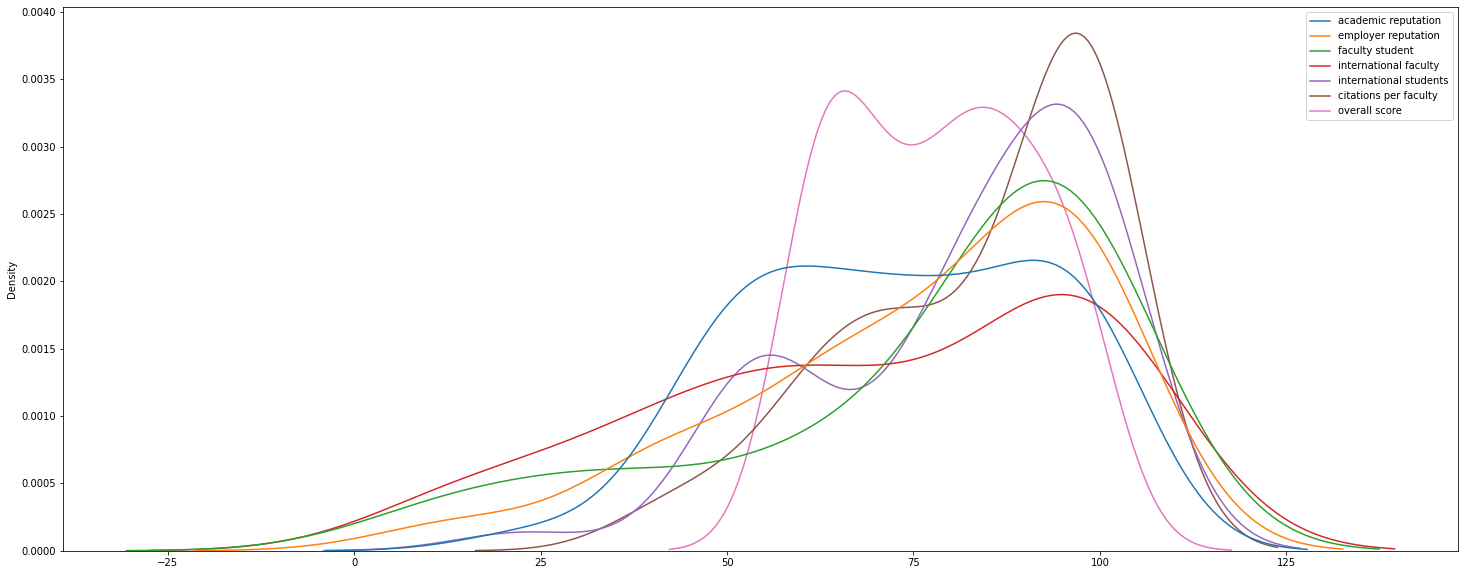

In [32]:
plt.figure(figsize = (25,10))
sns.kdeplot(data=USUK_2021)

#Since all the variables are quantitative, i think no variable needs to be removed

**You have reached the end of this assignment. Please check whether you have labelled all axes, titles, legends etc. These will carry a good weightage of marks. Have a good day!**

